In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import model_selection
%matplotlib inline

In [5]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/diabetes_data_upload.csv')
df.insert(0, 'ID', range(0, 0 + len(df)))
df.head()
df = df.reset_index(drop= True)
df['class'] = df['class'].apply(lambda x: 1 if x =='Positive' else 0)

FileNotFoundError: ignored

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=25)
kf = model_selection.KFold(n_splits = 5, shuffle= True, random_state =42)
df_train = df_train.reset_index(drop = True)
df_test

ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
398  398   53    Male       No         No                 No      Yes   
326  326   53    Male       No         No                 No      Yes   
77    77   55  Female      Yes        Yes                Yes       No   
231  231   32    Male       No         No                 No      Yes   
97    97   31  Female      Yes        Yes                Yes      Yes   
..   ...  ...     ...      ...        ...                ...      ...   
310  310   67    Male      Yes         No                 No      Yes   
348  348   28    Male       No         No                Yes       No   
45    45   48  Female       No         No                Yes      Yes   
517  517   58  Female      Yes        Yes                Yes      Yes   
260  260   33    Male       No        Yes                 No       No   

    Polyphagia Genital thrush visual blurring Itching Irritability  \
398        Yes             No             Yes     Yes           No   
326         No             No             Yes     Yes           No   
77         Yes             No              No     Yes           No   
231         No             No              No      No           No   
97         Yes             No              No     Yes          Yes   
..         ...            ...             ...     ...          ...   
310        Yes             No             Yes     Yes          Yes   
348         No             No              No      No           No   
45          No             No             Yes     Yes           No   
517        Yes             No             Yes      No           No   
260         No             No              No      No           No   

    delayed healing partial paresis muscle stiffness Alopecia Obesity  class  
398             Yes             Yes              Yes      Yes      No      0  
326             Yes              No              Yes      Yes      No      0  
77              Yes             Yes               No       No      No      1  
231              No              No               No       No      No      0  
97               No             Yes              Yes       No      No      1  
..              ...             ...              ...      ...     ...    ...  
310             Yes              No              Yes      Yes     Yes      0  
348              No              No               No       No      No      0  
45              Yes             Yes               No       No      No      1  
517              No             Yes              Yes       No     Yes      1  
260              No              No               No       No      No      1  

[156 rows x 18 columns]

In [6]:
for fold, (train_indicies, valid_indicies) in enumerate (kf.split(X =df_train)):
  df_train.loc[valid_indicies, "kfold"] = fold

In [7]:
df_test

ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
398  398   53    Male       No         No                 No      Yes   
326  326   53    Male       No         No                 No      Yes   
77    77   55  Female      Yes        Yes                Yes       No   
231  231   32    Male       No         No                 No      Yes   
97    97   31  Female      Yes        Yes                Yes      Yes   
..   ...  ...     ...      ...        ...                ...      ...   
310  310   67    Male      Yes         No                 No      Yes   
348  348   28    Male       No         No                Yes       No   
45    45   48  Female       No         No                Yes      Yes   
517  517   58  Female      Yes        Yes                Yes      Yes   
260  260   33    Male       No        Yes                 No       No   

    Polyphagia Genital thrush visual blurring Itching Irritability  \
398        Yes             No             Yes     Yes           No   
326         No             No             Yes     Yes           No   
77         Yes             No              No     Yes           No   
231         No             No              No      No           No   
97         Yes             No              No     Yes          Yes   
..         ...            ...             ...     ...          ...   
310        Yes             No             Yes     Yes          Yes   
348         No             No              No      No           No   
45          No             No             Yes     Yes           No   
517        Yes             No             Yes      No           No   
260         No             No              No      No           No   

    delayed healing partial paresis muscle stiffness Alopecia Obesity  class  
398             Yes             Yes              Yes      Yes      No      0  
326             Yes              No              Yes      Yes      No      0  
77              Yes             Yes               No       No      No      1  
231              No              No               No       No      No      0  
97               No             Yes              Yes       No      No      1  
..              ...             ...              ...      ...     ...    ...  
310             Yes              No              Yes      Yes     Yes      0  
348              No              No               No       No      No      0  
45              Yes             Yes               No       No      No      1  
517              No             Yes              Yes       No     Yes      1  
260              No              No               No       No      No      1  

[156 rows x 18 columns]

In [ ]:
df_train.to_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_train_folds_new.csv', index=False)
df_test.to_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds_new.csv', index=False)

In [9]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_train_folds_new.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds_new.csv')

In [10]:
df_train

ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
0    424   43    Male      Yes        Yes                Yes      Yes   
1    302   61  Female      Yes         No                 No       No   
2     24   58    Male      Yes        Yes                Yes      Yes   
3     84   35  Female      Yes        Yes                Yes      Yes   
4    401   36    Male       No         No                 No       No   
..   ...  ...     ...      ...        ...                ...      ...   
359  317   36  Female       No         No                 No      Yes   
360  143   53    Male      Yes         No                Yes       No   
361  474   27    Male       No         No                 No       No   
362  318   28  Female       No         No                 No       No   
363  132   30    Male      Yes        Yes                Yes      Yes   

    Polyphagia Genital thrush visual blurring Itching Irritability  \
0           No            Yes              No      No           No   
1          Yes             No              No      No          Yes   
2          Yes             No             Yes      No           No   
3          Yes             No             Yes     Yes           No   
4           No             No              No      No           No   
..         ...            ...             ...     ...          ...   
359         No             No              No      No          Yes   
360         No             No              No      No           No   
361         No             No              No      No           No   
362        Yes             No              No      No           No   
363         No            Yes              No      No           No   

    delayed healing partial paresis muscle stiffness Alopecia Obesity  class  \
0                No              No               No       No      No      1   
1                No              No               No      Yes      No      1   
2               Yes             Yes              Yes       No     Yes      1   
3               Yes             Yes              Yes       No      No      1   
4                No              No               No       No      No      0   
..              ...             ...              ...      ...     ...    ...   
359              No              No               No       No      No      0   
360             Yes             Yes               No       No      No      1   
361              No              No               No       No      No      0   
362              No             Yes               No       No      No      0   
363             Yes              No               No       No      No      1   

     kfold  
0      0.0  
1      4.0  
2      2.0  
3      0.0  
4      3.0  
..     ...  
359    1.0  
360    0.0  
361    4.0  
362    0.0  
363    4.0  

[364 rows x 19 columns]

In [11]:
useful_features = [c for c in df_train.columns if c not in ['class','kfold','ID']]
len(useful_features)

16

In [12]:
categorical_cols = [c for c in df_train.columns if c not in ['class','kfold','Age','ID']]

len(categorical_cols)

15

In [13]:
test_ids = df_test['ID']
df_test = df_test[useful_features]

In [14]:
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df_train[df_train.kfold != fold].reset_index(drop = True)
  xvalid = df_train[df_train.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  print("Encoding")
  ordinal_encoder = OrdinalEncoder()
  xtrain[categorical_cols] = ordinal_encoder.fit_transform(xtrain[categorical_cols])
  xvalid[categorical_cols] = ordinal_encoder.transform(xvalid[categorical_cols])
  xtest[categorical_cols] = ordinal_encoder.transform(xtest[categorical_cols])

  print("Training")
  model = XGBClassifier(
      random_state=42,
      n_estimators=7000,
      learning_rate=0.14079254161536683,
      reg_lambda=4.565328179025452e-05,
      reg_alpha=0.2690435546681672,
      subsample=0.5782181965684758,
      colsample_bytree=0.9841352534136749,
      max_depth=5,
  )
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_test_preds.append(test_preds)
  final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  # scores.append(rmse)
final_valid_preds = pd.DataFrame.from_dict(final_valid_preds, orient = 'index').reset_index()
final_valid_preds.columns =['ID','pred_1']
final_valid_preds.to_csv('train_pred1.csv', index=False)

df_tmp = pd.DataFrame(columns=['ID','pred_1'])
df_tmp.ID = test_ids
df_tmp.pred_1 = np.mean(np.column_stack(final_test_preds), axis=1)
# df_tmp
df_tmp.to_csv("test_pred_1.csv", index=False)

Encoding
Training
0 0.1655211777204736
Encoding
Training
1 0.3511234415883917
Encoding
Training
2 0.0
Encoding
Training
3 0.28669108954049793
Encoding
Training
4 0.0


In [ ]:
df_test

Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     53    Male       No         No                 No      Yes        Yes   
1     53    Male       No         No                 No      Yes         No   
2     55  Female      Yes        Yes                Yes       No        Yes   
3     32    Male       No         No                 No      Yes         No   
4     31  Female      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
151   67    Male      Yes         No                 No      Yes        Yes   
152   28    Male       No         No                Yes       No         No   
153   48  Female       No         No                Yes      Yes         No   
154   58  Female      Yes        Yes                Yes      Yes        Yes   
155   33    Male       No        Yes                 No       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
0               No             Yes     Yes           No             Yes   
1               No             Yes     Yes           No             Yes   
2               No              No     Yes           No             Yes   
3               No              No      No           No              No   
4               No              No     Yes          Yes              No   
..             ...             ...     ...          ...             ...   
151             No             Yes     Yes          Yes             Yes   
152             No              No      No           No              No   
153             No             Yes     Yes           No             Yes   
154             No             Yes      No           No              No   
155             No              No      No           No              No   

    partial paresis muscle stiffness Alopecia Obesity  
0               Yes              Yes      Yes      No  
1                No              Yes      Yes      No  
2               Yes               No       No      No  
3                No               No       No      No  
4               Yes              Yes       No      No  
..              ...              ...      ...     ...  
151              No              Yes      Yes     Yes  
152              No               No       No      No  
153             Yes               No       No      No  
154             Yes              Yes       No     Yes  
155              No               No       No      No  

[156 rows x 16 columns]

In [15]:
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df_train[df_train.kfold != fold].reset_index(drop = True)
  xvalid = df_train[df_train.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  print("Encoding")
  ordinal_encoder = OrdinalEncoder()
  xtrain[categorical_cols] = ordinal_encoder.fit_transform(xtrain[categorical_cols])
  xvalid[categorical_cols] = ordinal_encoder.transform(xvalid[categorical_cols])
  xtest[categorical_cols] = ordinal_encoder.transform(xtest[categorical_cols])

  print("Training")
  model = RandomForestClassifier(
          random_state=42,n_jobs =-1, n_estimators=7, max_depth=13.7430864928304
          )
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_test_preds.append(test_preds)
  final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  # scores.append(rmse)
final_valid_preds = pd.DataFrame.from_dict(final_valid_preds, orient = 'index').reset_index()
final_valid_preds.columns =['ID','pred_2']
final_valid_preds.to_csv('train_pred2.csv', index=False)

df_tmp = pd.DataFrame(columns=['ID','pred_2'])
df_tmp.ID = test_ids
df_tmp.pred_2 = np.mean(np.column_stack(final_test_preds), axis=1)
# df_tmp
df_tmp.to_csv("test_pred_2.csv", index=False)

Encoding
Training
0 0.1655211777204736
Encoding
Training
1 0.28669108954049793
Encoding
Training
2 0.0
Encoding
Training
3 0.28669108954049793
Encoding
Training
4 0.0


In [16]:
def one_hot(array):
  one_hot_array = []
  for val in array:
    if val == "Positive":
      one_hot_array.append(1)
    else:
      one_hot_array.append(0)
  return one_hot_array

In [17]:
import tensorflow as tf

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df_train[df_train.kfold != fold].reset_index(drop = True)
  xvalid = df_train[df_train.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  ct = make_column_transformer(
    (MinMaxScaler(), ["Age"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush",
                                              "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness",
                                              "Alopecia", "Obesity"])
  )
  ct.fit(xtrain)
  X_train_normal = ct.transform(xtrain)
  X_valid_normal = ct.transform(xvalid)
  X_test_normal = ct.transform(xtest)

  

  # y_train = np.array(one_hot(ytrain))
  # y_test = np.array(one_hot(ytest))

  print("Training")
  model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(31, )),
  tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_1"),
  tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_2"),
  tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
  ], name="Diabetes_Model")

  # Compile the model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])
  history = model.fit(X_train_normal, ytrain, epochs=100, verbose=1)

  preds_valid = model.predict(X_valid_normal)
  test_preds = model.predict(X_test_normal)
  final_test_preds.append(test_preds)
  final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  print(rmse)
  # scores.append(rmse)
final_valid_preds = pd.DataFrame.from_dict(final_valid_preds, orient = 'index').reset_index()
final_valid_preds.columns =['ID','pred_3']
final_valid_preds.to_csv('train_pred3.csv', index=False)

df_tmp = pd.DataFrame(columns=['ID','pred_3'])
df_tmp.ID = test_ids
df_tmp.pred_3 = np.mean(np.column_stack(final_test_preds), axis=1)
# df_tmp
df_tmp.to_csv("test_pred_3.csv", index=False)

Training
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.7101 - accuracy: 0.5911
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.5911
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.5911
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6460
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7388
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8179
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8591
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8729
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8763
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8797


In [19]:
from sklearn.svm import SVC
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df_train[df_train.kfold != fold].reset_index(drop = True)
  xvalid = df_train[df_train.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  print("Encoding")
  ordinal_encoder = OrdinalEncoder()
  xtrain[categorical_cols] = ordinal_encoder.fit_transform(xtrain[categorical_cols])
  xvalid[categorical_cols] = ordinal_encoder.transform(xvalid[categorical_cols])
  xtest[categorical_cols] = ordinal_encoder.transform(xtest[categorical_cols])

  print("Training")
  model = SVC(
          random_state=42,kernel='linear'
          )
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_test_preds.append(test_preds)
  final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  print(rmse)
  # scores.append(rmse)
final_valid_preds = pd.DataFrame.from_dict(final_valid_preds, orient = 'index').reset_index()
final_valid_preds.columns =['ID','pred_4']
final_valid_preds.to_csv('train_pred4.csv', index=False)

df_tmp = pd.DataFrame(columns=['ID','pred_4'])
df_tmp.ID = test_ids
df_tmp.pred_4 = np.mean(np.column_stack(final_test_preds), axis=1)
# df_tmp
df_tmp.to_csv("test_pred_4.csv", index=False)

Encoding
Training
0 0.3310423554409472
0.3310423554409472
Encoding
Training
1 0.38818157028232203
0.38818157028232203
Encoding
Training
2 0.1655211777204736
0.1655211777204736
Encoding
Training
3 0.30966176864266615
0.30966176864266615
Encoding
Training
4 0.16666666666666666
0.16666666666666666


In [20]:
from sklearn.linear_model import LogisticRegression
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df_train[df_train.kfold != fold].reset_index(drop = True)
  xvalid = df_train[df_train.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  print("Encoding")
  ordinal_encoder = OrdinalEncoder()
  xtrain[categorical_cols] = ordinal_encoder.fit_transform(xtrain[categorical_cols])
  xvalid[categorical_cols] = ordinal_encoder.transform(xvalid[categorical_cols])
  xtest[categorical_cols] = ordinal_encoder.transform(xtest[categorical_cols])

  print("Training")
  model = LogisticRegression(random_state = fold, max_iter = 500, C = 257.92)
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_test_preds.append(test_preds)
  final_valid_preds.update(dict(zip(valid_ids, preds_valid)))
  print(fold, mean_squared_error(yvalid, preds_valid, squared =False))
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  print(rmse)
  # scores.append(rmse)
final_valid_preds = pd.DataFrame.from_dict(final_valid_preds, orient = 'index').reset_index()
final_valid_preds.columns =['ID','pred_5']
final_valid_preds.to_csv('train_pred5.csv', index=False)

df_tmp = pd.DataFrame(columns=['ID','pred_5'])
df_tmp.ID = test_ids
df_tmp.pred_5 = np.mean(np.column_stack(final_test_preds), axis=1)
# df_tmp
df_tmp.to_csv("test_pred_5.csv", index=False)

Encoding
Training
0 0.28669108954049793
0.28669108954049793
Encoding
Training
1 0.3511234415883917
0.3511234415883917
Encoding
Training
2 0.2027212135198458
0.2027212135198458
Encoding
Training
3 0.30966176864266615
0.30966176864266615
Encoding
Training
4 0.16666666666666666
0.16666666666666666


In [21]:
import pandas as pd

In [97]:
## Original Data
df = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_train_folds_new.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds_new.csv')


### FOr training
df1 = pd.read_csv('train_pred1.csv')  ## XGBoost
df2 = pd.read_csv('train_pred2.csv') ##Random Forest
df3 = pd.read_csv('train_pred3.csv') ## Neural Network
df4 = pd.read_csv('train_pred4.csv') ## SVM
df5 = pd.read_csv('train_pred5.csv') ## Logistic Regression


## For testing
df1_test = pd.read_csv('test_pred_1.csv')
df2_test = pd.read_csv('test_pred_2.csv')
df3_test = pd.read_csv('test_pred_3.csv')
df4_test = pd.read_csv('test_pred_4.csv')
df5_test = pd.read_csv('test_pred_5.csv')


In [98]:
df3_test['pred_3'] = df3_test['pred_3'].apply(lambda x: 1 if x >=0.5 else 0)
df3['pred_3'] = df3['pred_3'].apply(lambda x: 1 if x >=0.5 else 0)

In [30]:
df3_test

ID  pred_3
0    398       0
1    326       0
2     77       1
3    231       0
4     97       1
..   ...     ...
151  310       1
152  348       0
153   45       1
154  517       1
155  260       1

[156 rows x 2 columns]

In [ ]:
l1 = df1_test['ID'].to_list()
l2 = df2_test['ID'].to_list()
l3 = df_test['ID']
len(set(l1).intersection(l3))

156

In [99]:
# df = df.merge(df1, on='ID', how = 'left')
df = df.merge(df2, on='ID', how = 'left')
df = df.merge(df3, on='ID', how = 'left')
# df = df.merge(df4, on='ID', how = 'left')
df = df.merge(df5, on='ID', how = 'left')

In [39]:
df.pred_3.value_counts()

1    225
0    139
Name: pred_3, dtype: int64

In [100]:
# df_test = df_test.merge(df1_test, on='ID', how = 'left')
df_test = df_test.merge(df2_test, on='ID', how = 'left')
df_test = df_test.merge(df3_test, on='ID', how = 'left')
# df_test = df_test.merge(df4_test, on='ID', how = 'left')
df_test = df_test.merge(df5_test, on='ID', how = 'left')

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
df_test.head()

ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
0  398   53    Male       No         No                 No      Yes   
1  326   53    Male       No         No                 No      Yes   
2   77   55  Female      Yes        Yes                Yes       No   
3  231   32    Male       No         No                 No      Yes   
4   97   31  Female      Yes        Yes                Yes      Yes   

  Polyphagia Genital thrush visual blurring  ... partial paresis  \
0        Yes             No             Yes  ...             Yes   
1         No             No             Yes  ...              No   
2        Yes             No              No  ...             Yes   
3         No             No              No  ...              No   
4        Yes             No              No  ...             Yes   

  muscle stiffness Alopecia Obesity class pred_1 pred_2  pred_3  pred_4  \
0              Yes      Yes      No     0    0.0    0.0       0     0.0   
1              Yes      Yes      No     0    0.0    0.0       0     0.0   
2               No       No      No     1    1.0    1.0       1     1.0   
3               No       No      No     0    0.0    0.0       0     0.0   
4              Yes       No      No     1    1.0    1.0       1     1.0   

   pred_5  
0     0.0  
1     0.0  
2     1.0  
3     0.0  
4     1.0  

[5 rows x 23 columns]

In [101]:
# 'pred_1','pred_2','pred_3',
useful_features = ['pred_2','pred_3','pred_5']
df_test = df_test[useful_features]
final_test_preds= []
final_valid_preds ={}
for fold in range(5):

  xtrain = df[df.kfold != fold].reset_index(drop = True)
  xvalid = df[df.kfold == fold].reset_index(drop= True)
  xtest = df_test.copy(deep = True)

  valid_ids = xvalid['ID'].to_list()

  
  ytrain = xtrain['class']
  yvalid = xvalid['class']

  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]

  print("Training")
  model = LogisticRegression(max_iter =500)
  model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  test_preds = model.predict(xtest)
  final_test_preds.append(test_preds)
  rmse = mean_squared_error(yvalid, preds_valid, squared =False)
  print(fold, rmse)

Training
0 0.1655211777204736
Training
1 0.30966176864266615
Training
2 0.11704114719613055
Training
3 0.28669108954049793
Training
4 0.0


In [102]:
target_preds = np.mean(np.column_stack(final_test_preds), axis=1)
target_preds = pd.DataFrame(target_preds).reset_index()
target_preds.columns = ['id','target']
target_preds['target'] = target_preds['target'].apply(lambda x: 1 if x>=0.5 else 0)
target_preds

id  target
0      0       0
1      1       0
2      2       1
3      3       0
4      4       1
..   ...     ...
151  151       1
152  152       0
153  153       1
154  154       1
155  155       1

[156 rows x 2 columns]

In [92]:
target_preds['target'].value_counts()

1    94
0    62
Name: target, dtype: int64

In [103]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Thesis/Diabetes Dataset/df_test_folds_new.csv')
# df_test
y_real = df_test['class']

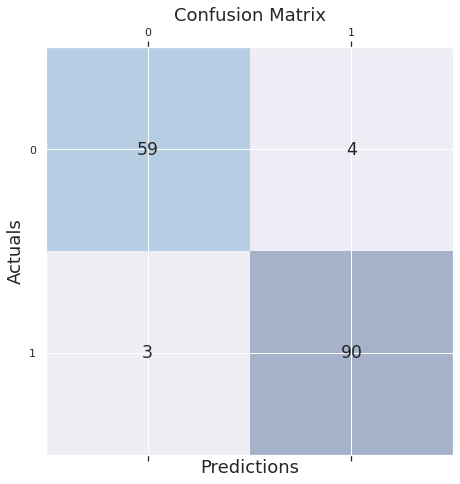

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_matrix = confusion_matrix(y_true=y_real, y_pred=target_preds['target'])
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [105]:
acc = accuracy_score(y_real, target_preds['target'])

In [106]:
print(acc)

0.9551282051282052


In [ ]:
### No improvement after inducing SVM layer